# WeatherPy
----
### analysis

   * There is a strong corelation between latitude and temperature. The cities of lower latitude area (close to the              Equater) have higher temperatures, the cities of higher latitude area have lower temperatures. But might be due to 
     the earth tilt, the temperature peak is not exactly at the Equter.
   * No significant corelation was found between latitude and cloudiness, wind speed.
   * The corelation between latitude and humidity is weak, but the average humidity of the Equater area is higher than          other area.
  


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls

In [3]:
# create empty list to store data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# count the api call times
record_number = 1
record_set = 1

print("Beginning Data Retrieval\n-----------------------------")

# get weather data
# loop every city in the cities list
for city in cities:
    try:
        query_url = base_url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        weather_json = requests.get(query_url).json()
        city_name.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        record_city = weather_json["name"]
        print(f"Processing Record {record_number} of Set {record_set} | {record_city}")
        record_number = record_number + 1
        
        # avoid triggle api free account limitation 
        # 50 records a set, then wait one minute to run next set
        if record_number > 50:         
            record_number = 1
            record_set = record_set + 1
            time.sleep(60)
              
    except:
        print("City not found. Skipping...")
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Atuona
Processing Record 2 of Set 1 | Rikitea
Processing Record 3 of Set 1 | Port Elizabeth
Processing Record 4 of Set 1 | East London
Processing Record 5 of Set 1 | Butaritari
Processing Record 6 of Set 1 | Tasiilaq
City not found. Skipping...
Processing Record 7 of Set 1 | Albany
Processing Record 8 of Set 1 | Los Llanos de Aridane
Processing Record 9 of Set 1 | San Carlos de Bariloche
Processing Record 10 of Set 1 | Marrakesh
Processing Record 11 of Set 1 | Yarega
Processing Record 12 of Set 1 | Bluff
Processing Record 13 of Set 1 | Mahebourg
Processing Record 14 of Set 1 | Hobart
Processing Record 15 of Set 1 | Larsnes
Processing Record 16 of Set 1 | Dikson
Processing Record 17 of Set 1 | Kapaa
Processing Record 18 of Set 1 | Darfield
Processing Record 19 of Set 1 | Punta Arenas
Processing Record 20 of Set 1 | Ginir
Processing Record 21 of Set 1 | Ulaanbaatar
Processing Record 22 of Set 1 | Richar

Processing Record 34 of Set 4 | Coquimbo
Processing Record 35 of Set 4 | Pechory
Processing Record 36 of Set 4 | Eyl
Processing Record 37 of Set 4 | Srednekolymsk
Processing Record 38 of Set 4 | Zhicheng
City not found. Skipping...
Processing Record 39 of Set 4 | Lenger
Processing Record 40 of Set 4 | Cairns
City not found. Skipping...
Processing Record 41 of Set 4 | New Norfolk
Processing Record 42 of Set 4 | Arman
Processing Record 43 of Set 4 | Saint-Pierre
Processing Record 44 of Set 4 | Pokosnoye
Processing Record 45 of Set 4 | Buraydah
Processing Record 46 of Set 4 | Myre
Processing Record 47 of Set 4 | Bermejo
Processing Record 48 of Set 4 | Yueyang
Processing Record 49 of Set 4 | Auki
Processing Record 50 of Set 4 | Yellowknife
Processing Record 1 of Set 5 | Mount Gambier
Processing Record 2 of Set 5 | Puri
Processing Record 3 of Set 5 | Torbay
Processing Record 4 of Set 5 | Sopur
Processing Record 5 of Set 5 | Staryy Nadym
Processing Record 6 of Set 5 | Sitka
Processing Record

Processing Record 23 of Set 8 | La Rioja
Processing Record 24 of Set 8 | San Patricio
Processing Record 25 of Set 8 | Macusani
Processing Record 26 of Set 8 | Tahe
City not found. Skipping...
City not found. Skipping...
Processing Record 27 of Set 8 | Semporna
Processing Record 28 of Set 8 | Ocos
Processing Record 29 of Set 8 | Luau
Processing Record 30 of Set 8 | Trairi
Processing Record 31 of Set 8 | Luganville
Processing Record 32 of Set 8 | Pisco
Processing Record 33 of Set 8 | Olinda
Processing Record 34 of Set 8 | Bonavista
City not found. Skipping...
Processing Record 35 of Set 8 | Bubaque
Processing Record 36 of Set 8 | Borova
Processing Record 37 of Set 8 | Pinawa
Processing Record 38 of Set 8 | Cervo
Processing Record 39 of Set 8 | Shetpe
Processing Record 40 of Set 8 | Vrangel
City not found. Skipping...
Processing Record 41 of Set 8 | Loa Janan
Processing Record 42 of Set 8 | Isangel
Processing Record 43 of Set 8 | Harper
Processing Record 44 of Set 8 | Madanapalle
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary with the lists generated
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
}

# create dataframe
weather_df = pd.DataFrame(weather_dict) 
weather_df.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [5]:
# export data to csv
weather_df.to_csv("output_data/cities_weather.csv")

# display dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,13,PF,1564162538,76,-9.80,-139.03,79.78,12.95
1,Rikitea,2,PF,1564162538,82,-23.12,-134.97,73.30,8.97
2,Port Elizabeth,1,US,1564162538,33,39.31,-74.98,89.01,4.70
3,East London,0,ZA,1564162539,88,-33.02,27.91,62.60,9.17
4,Butaritari,78,KI,1564162539,73,3.07,172.79,83.38,5.26


### Plotting the Data

#### Latitude vs. Temperature Plot

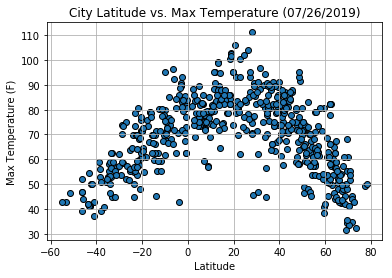

In [6]:
# build a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", linewidths=1, edgecolors="black")
plt.title("City Latitude vs. Max Temperature (07/26/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# save the figure
plt.savefig("output_data/city_lat_vs_temp.png")

# show plot
plt.show()

#### Latitude vs. Humidity Plot

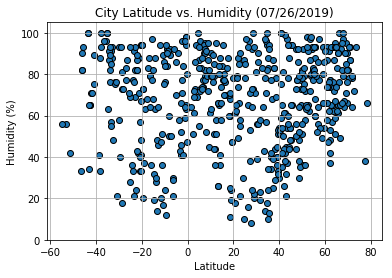

In [13]:
# build a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", linewidths=1, edgecolors="black")
plt.title("City Latitude vs. Humidity (07/26/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 105)
plt.grid()

# save the figure
plt.savefig("output_data/city_lat_vs_humidity.png")

# show plot
plt.show()

#### Latitude vs. Cloudiness Plot

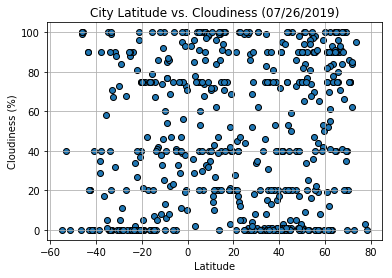

In [8]:
# build a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", linewidths=1, edgecolors="black")
plt.title("City Latitude vs. Cloudiness (07/26/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# save the figure
plt.savefig("output_data/city_lat_vs_cloudiness.png")

# show plot
plt.show()

#### Latitude vs. Wind Speed Plot

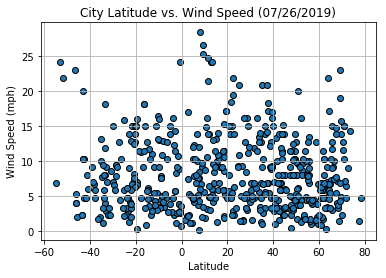

In [9]:
# build a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", linewidths=1, edgecolors="black")
plt.title("City Latitude vs. Wind Speed (07/26/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# save the figure
plt.savefig("output_data/city_lat_vs_wind_speed.png")

# show plot
plt.show()